In [2]:
import pandas as pd
import numpy as np

import seaborn
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/abhinavyadav/Kaggle/Kaggle-Swags/Kaggle-Competition/Road-Accident-Prediction/train.csv')
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
df.shape

(517754, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [6]:
df.sample(10)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
454017,454017,highway,4,0.28,35,dim,foggy,False,False,evening,False,True,1,0.23
313083,313083,highway,2,0.72,25,night,rainy,True,True,morning,False,True,2,0.55
63296,63296,urban,1,0.58,35,night,clear,False,False,morning,True,False,0,0.38
43527,43527,urban,4,0.47,70,dim,rainy,True,True,morning,True,True,2,0.34
296550,296550,rural,2,0.59,60,daylight,clear,True,False,evening,False,False,2,0.37
115611,115611,urban,3,0.27,45,dim,clear,False,True,afternoon,False,False,2,0.07
489290,489290,rural,4,0.43,25,daylight,rainy,True,False,evening,True,False,2,0.22
209052,209052,rural,2,0.92,25,night,clear,False,True,evening,False,False,3,0.60
245015,245015,rural,3,0.17,45,dim,rainy,True,True,evening,False,False,1,0.17
473843,473843,urban,2,0.86,25,dim,rainy,False,False,morning,False,False,2,0.40


In [7]:
df.set_index("id", inplace=True)

In [8]:
df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [9]:
df['road_type'].value_counts()

road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64

<Axes: xlabel='road_type'>

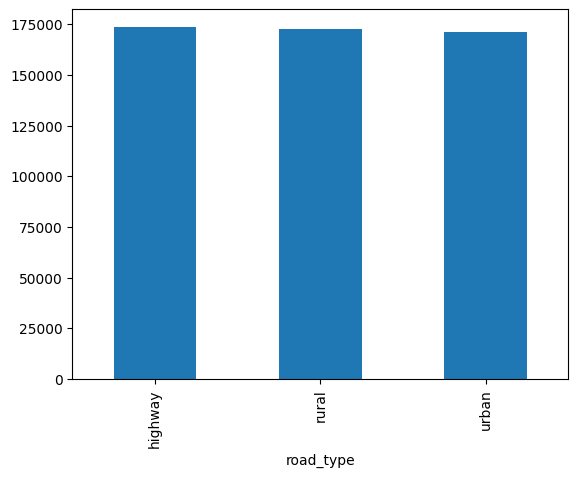

In [10]:
df['road_type'].value_counts().plot(kind='bar')

In [11]:
df['num_lanes'].max(), df['num_lanes'].min()

(4, 1)

In [12]:
df[df['curvature'] > 0.8]

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
12,urban,4,0.84,25,dim,rainy,True,True,morning,False,True,2,0.37
19,highway,2,0.86,70,night,clear,False,False,evening,False,False,3,0.79
30,highway,2,0.95,45,daylight,foggy,True,False,evening,True,True,2,0.38
57,urban,3,0.98,60,dim,clear,False,False,afternoon,True,False,2,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517735,urban,3,0.84,45,night,foggy,False,True,morning,True,True,3,0.56
517737,highway,3,0.97,25,dim,clear,False,False,evening,True,True,1,0.39
517738,urban,1,0.81,25,daylight,rainy,True,True,evening,False,True,3,0.45


- Basically here curvature 1 means may be (right$left) turn.

In [13]:
## Therefore let's considered the dangerous turns

danger_zone = df[(df['curvature'] > 0.4) & (df['curvature'] < 0.8)]

#filtered_df = df[df['curvature'].between(0.4, 0.8)]

In [14]:
danger_zone['accident_risk'].mean()

0.4007008324942463

- To make it comparable let's find the for curvature < 0.4 and curvature > 0.8

In [15]:
low_curv_zone = df[(df['curvature'] < 0.5)]

In [16]:
low_curv_zone['accident_risk'].mean()

0.26527463267582907

In [17]:
high_curv_zone = df[(df['curvature'] > 0.8)]

In [18]:
high_curv_zone['accident_risk'].mean()

0.4668464129724745

In [19]:
## After calculating for all the case I observe that there is danger is not much helpful the mean of the high_curv_zone has higher 'ACCIDENT_RISK'

- HERE we can conclude that the curvature column is useful while predicting!

In [20]:
import seaborn as sns

In [21]:
df.sample(10)

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
473556,urban,2,0.86,25,daylight,clear,True,False,evening,True,False,0,0.27
369843,highway,3,0.58,35,dim,clear,False,True,morning,False,True,1,0.23
297649,highway,2,0.58,45,dim,foggy,False,True,afternoon,True,False,2,0.36
392399,rural,3,0.18,35,night,rainy,True,True,evening,True,False,1,0.32
516203,rural,4,0.03,45,daylight,clear,False,False,evening,False,False,2,0.04
416497,urban,2,0.29,60,night,clear,False,True,morning,True,True,2,0.45
2414,urban,1,0.98,45,daylight,foggy,True,True,afternoon,True,True,1,0.46
121169,rural,3,0.86,25,dim,rainy,True,False,evening,False,False,0,0.34
50431,urban,3,0.16,60,dim,clear,False,False,afternoon,True,True,0,0.27


In [22]:
df['speed_limit'].max(), df['speed_limit'].min()

(70, 25)

## Let's perform the EDA (Bi-Variate Analysis) 

In [23]:
## Both are categorical column
df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [24]:
df['road_type'].value_counts()

road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64

In [25]:
df['road_signs_present']

id
0         False
1          True
2         False
3          True
4         False
          ...  
517749     True
517750     True
517751    False
517752     True
517753    False
Name: road_signs_present, Length: 517754, dtype: bool

In [26]:
## 1) To form contigency table
import pandas

ct = pd.crosstab(df['road_type'], df['road_signs_present'])
print(ct)

road_signs_present  False  True 
road_type                       
highway             87091  86581
rural               86466  86253
urban               85732  85631


- you can see this is DL generated data that's why holding such a uniformity among the data

### Percentage wise 

In [27]:
pd.crosstab(df['road_type'], df['road_signs_present'], normalize='index') * 100

road_signs_present,False,True
road_type,,
highway,50.146829,49.853171
rural,50.061661,49.938339
urban,50.029470,49.970530


## Chi-Square Test

- p < 0.05 → significant association (columns aren’t independent).
-	p > 0.05 → no strong relationship.

In [28]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)
print("Chi2:", chi2, "p-value:", p)

Chi2: 0.5084685860312772 p-value: 0.775510084163415


## Stacked Chart

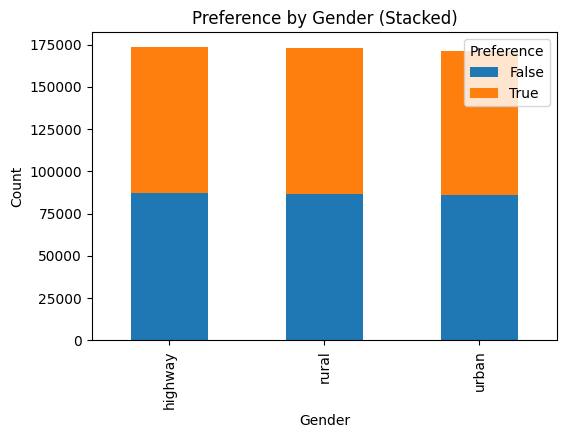

In [29]:
ct.plot(kind='bar', stacked=True, figsize=(6,4))

plt.title("Preference by Gender (Stacked)")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.legend(title="Preference")
plt.show()

### Heat Map

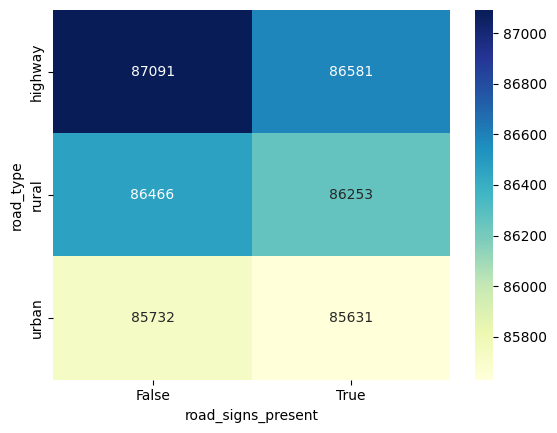

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [31]:
df.sample(10)

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
290956,highway,2,0.26,45,daylight,rainy,False,False,evening,True,False,0,0.23
183572,highway,2,0.51,45,dim,foggy,False,False,evening,False,False,0,0.24
390230,highway,2,0.94,45,daylight,clear,False,False,morning,True,True,1,0.27
103570,highway,2,0.75,25,daylight,clear,True,True,afternoon,False,False,1,0.34
498218,urban,1,0.51,70,daylight,clear,True,True,morning,False,True,0,0.28
400599,urban,4,0.03,35,night,foggy,True,False,morning,False,True,2,0.38
203474,highway,3,0.03,60,daylight,rainy,True,True,afternoon,True,True,1,0.38
46539,highway,1,0.01,35,dim,clear,True,True,afternoon,True,False,1,0.05
513944,urban,3,0.47,70,daylight,rainy,True,False,afternoon,False,True,2,0.47


/var/folders/7t/n462s2b57s7c6mrh4_0cmrq40000gn/T/ipykernel_61480/1522396809.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='accident_risk', data=df, palette="Set2")


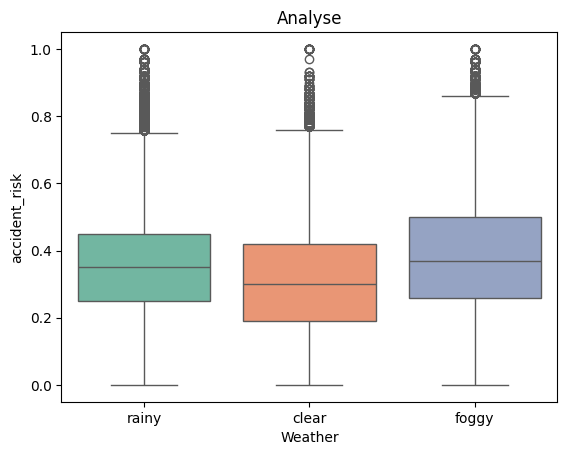

In [32]:
sns.boxplot(x='weather', y='accident_risk', data=df, palette="Set2")

plt.title("Analyse")
plt.xlabel("Weather")
plt.ylabel("accident_risk")
plt.show()

In [33]:
cov_xy = df['curvature'].cov(df['accident_risk'])
print("Covariance:", cov_xy)

Covariance: 0.0246729491100294


In [34]:
df.sample(10)

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
142016,urban,1,0.90,25,daylight,rainy,True,True,evening,True,False,1,0.40
134014,rural,3,0.15,35,night,rainy,False,False,afternoon,False,False,0,0.33
315209,rural,2,0.13,60,daylight,clear,False,True,afternoon,True,False,1,0.19
143157,highway,3,0.12,70,dim,rainy,True,False,evening,False,True,1,0.27
72533,urban,2,0.06,35,dim,clear,False,False,morning,True,False,2,0.08
31472,urban,1,0.55,25,daylight,foggy,False,True,morning,True,False,1,0.19
212537,rural,3,0.74,45,night,foggy,True,False,evening,False,True,0,0.52
257528,rural,2,0.14,45,night,clear,False,False,evening,False,True,4,0.20
155226,highway,1,0.26,35,dim,rainy,False,False,evening,False,True,2,0.24


In [35]:
df['road_type']

id
0           urban
1           urban
2           rural
3         highway
4           rural
           ...   
517749    highway
517750      rural
517751      urban
517752    highway
517753    highway
Name: road_type, Length: 517754, dtype: object

In [36]:
df['road_type'].value_counts()

road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64

In [37]:
df.sample(10)

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
95222,highway,2,0.95,60,daylight,foggy,True,True,morning,False,True,2,0.50
7473,rural,1,0.37,45,dim,rainy,False,False,morning,False,False,1,0.25
185870,rural,1,0.71,60,dim,foggy,True,True,afternoon,False,True,2,0.49
65325,highway,4,0.04,45,night,foggy,True,True,evening,False,True,1,0.33
91139,urban,2,0.84,25,dim,rainy,True,False,afternoon,False,True,1,0.35
501081,rural,1,0.89,70,dim,clear,False,True,morning,True,True,0,0.42
83132,highway,4,0.52,60,dim,clear,False,True,evening,False,False,2,0.35
247128,urban,3,0.12,25,dim,foggy,True,False,afternoon,True,False,1,0.09
160897,urban,4,0.82,45,daylight,rainy,True,False,evening,False,True,0,0.35


In [38]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_df = df[num_cols]

In [39]:
num_df

,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
id,,,,,
0,2,0.06,35,1,0.13
1,4,0.99,35,0,0.35
2,4,0.63,70,2,0.30
3,4,0.07,35,1,0.21
4,1,0.58,60,1,0.56
...,...,...,...,...,...
517749,4,0.10,70,2,0.32
517750,4,0.47,35,1,0.26
517751,4,0.62,25,0,0.19


In [40]:
corr_matrix = num_df.corr()
corr_matrix

,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
num_lanes,1.000000,-0.020245,0.001194,0.017662,-0.006003
curvature,-0.020245,1.000000,0.008399,0.145034,0.543946
speed_limit,0.001194,0.008399,1.000000,0.031373,0.430898
num_reported_accidents,0.017662,0.145034,0.031373,1.000000,0.213891
accident_risk,-0.006003,0.543946,0.430898,0.213891,1.000000


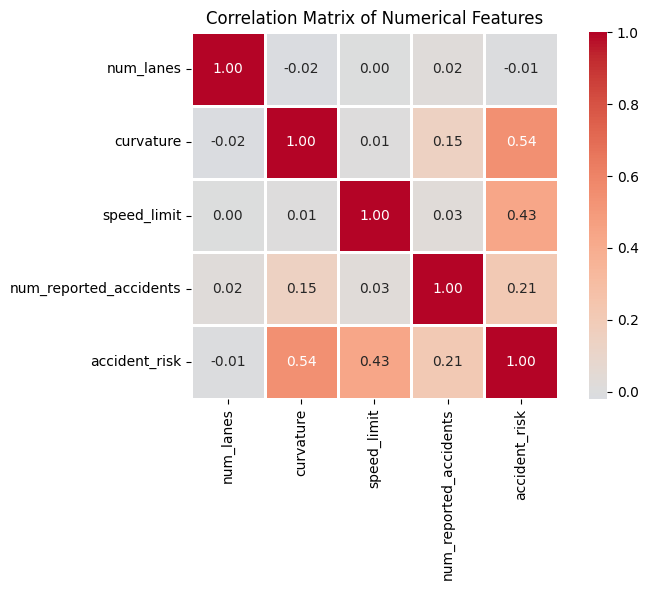

In [41]:
# Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [42]:
df['speed_limit']

id
0         35
1         35
2         70
3         35
4         60
          ..
517749    70
517750    35
517751    25
517752    25
517753    45
Name: speed_limit, Length: 517754, dtype: int64

## Let's plot the Scatter-Plot to understand the 2 Numerical Columns

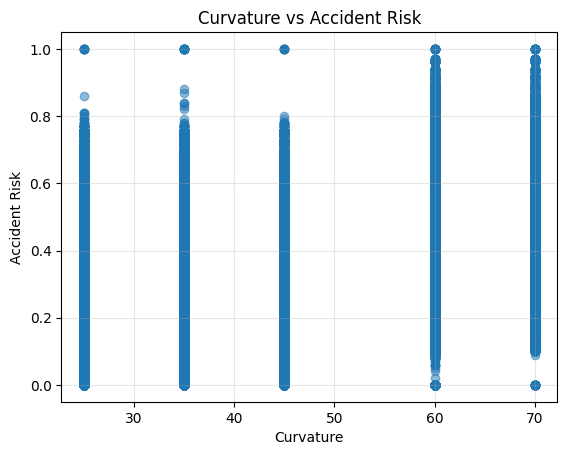

In [43]:
plt.scatter(df['speed_limit'], df['accident_risk'], alpha=0.5)
plt.xlabel('Curvature')
plt.ylabel('Accident Risk')
plt.title('Curvature vs Accident Risk')
plt.grid(True, alpha=0.3)
plt.show()


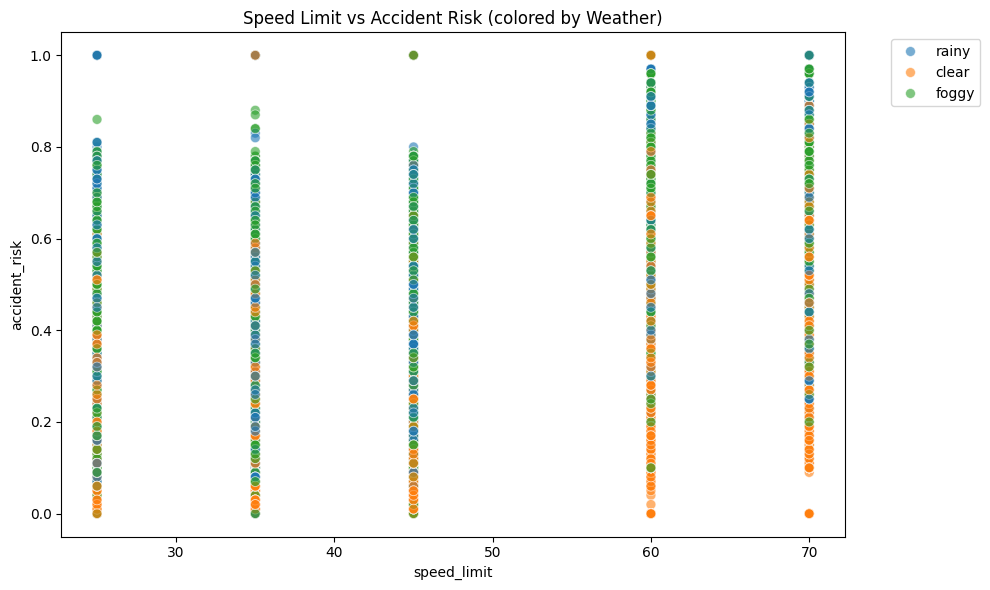

In [44]:
# Beautiful

plt.figure(figsize=(10, 6))
sns.scatterplot(x='speed_limit', y='accident_risk', hue='weather', 
                data=df, alpha=0.6, s=50)
plt.title('Speed Limit vs Accident Risk (colored by Weather)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

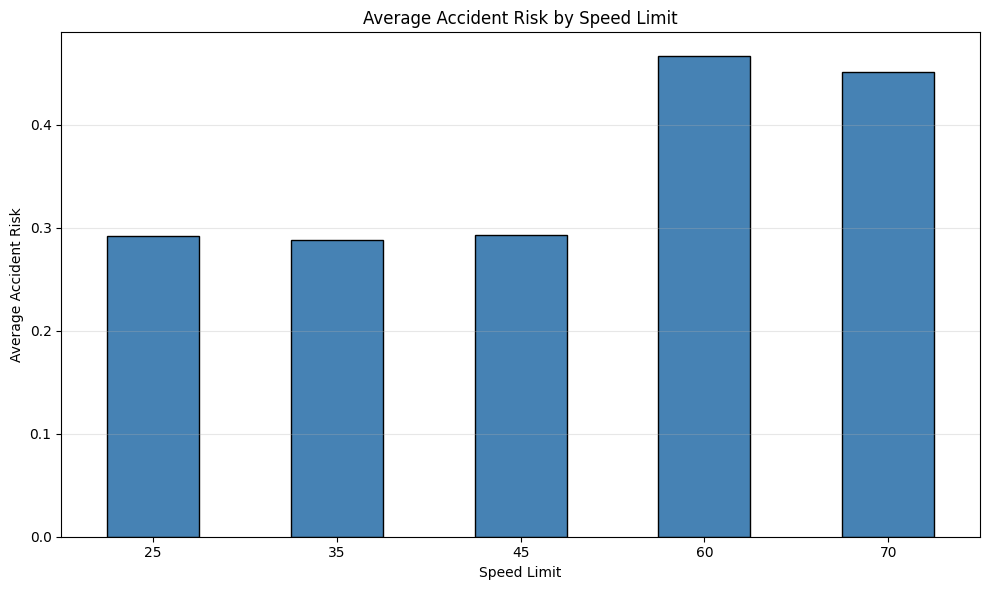

In [49]:
# Calculate average accident risk for each speed limit
speed_risk = df.groupby('speed_limit')['accident_risk'].mean().sort_index()

plt.figure(figsize=(10, 6))
speed_risk.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Speed Limit')
plt.ylabel('Average Accident Risk')
plt.title('Average Accident Risk by Speed Limit')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

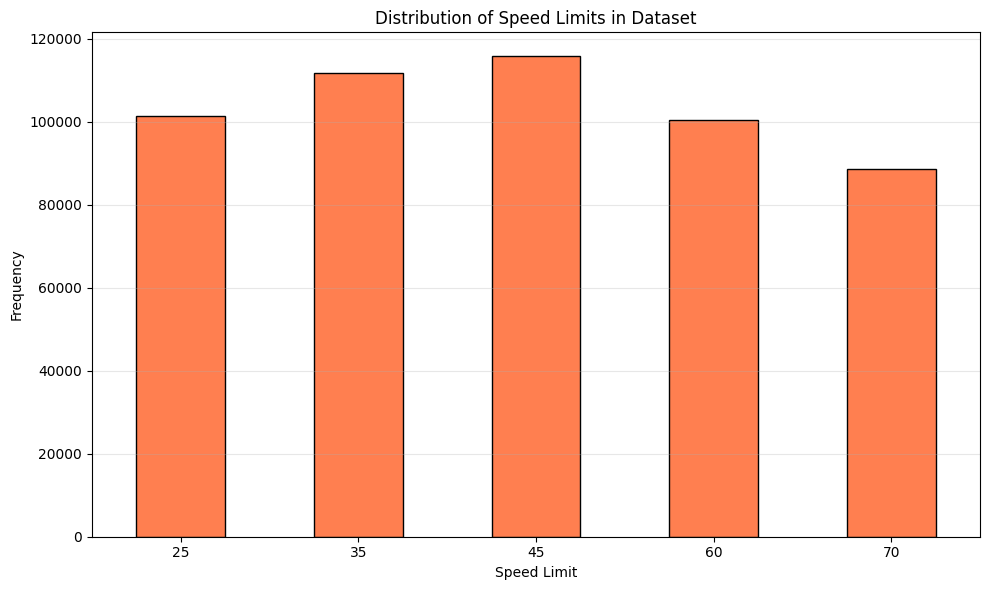

In [57]:
plt.figure(figsize=(10, 6))
df['speed_limit'].value_counts().sort_index().plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.title('Distribution of Speed Limits in Dataset')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/7t/n462s2b57s7c6mrh4_0cmrq40000gn/T/ipykernel_61480/880872200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='speed_limit', y='accident_risk', data=df,


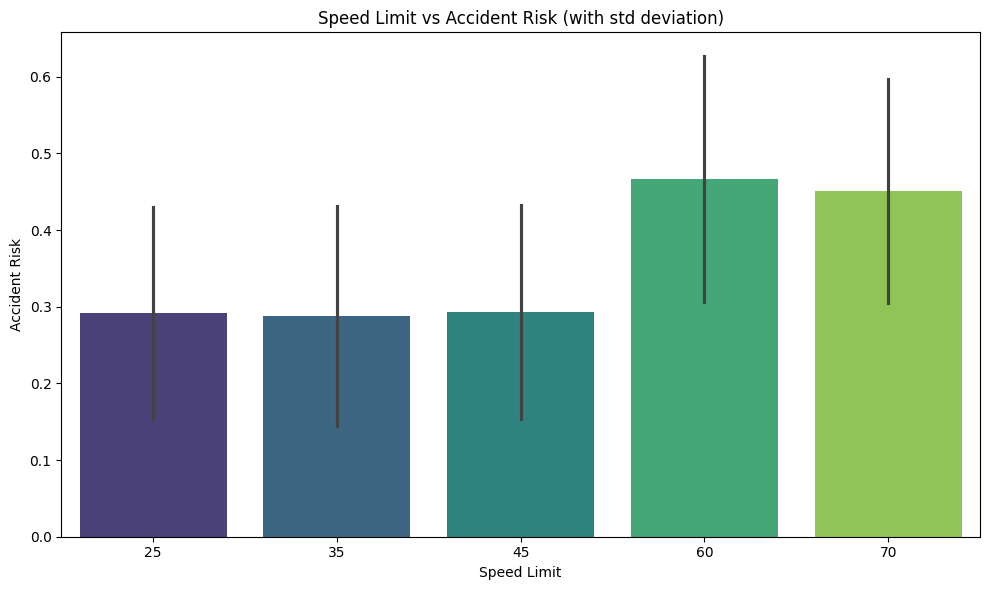

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='speed_limit', y='accident_risk', data=df, 
            palette='viridis', errorbar='sd')
plt.xlabel('Speed Limit')
plt.ylabel('Accident Risk')
plt.title('Speed Limit vs Accident Risk (with std deviation)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [60]:
df.sample(5)

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
159525,rural,4,0.81,60,dim,clear,False,True,morning,False,True,1,0.47
57678,highway,1,0.36,60,daylight,rainy,False,False,morning,False,False,1,0.48
428253,highway,4,0.62,70,daylight,clear,False,False,afternoon,True,True,2,0.36
303358,rural,3,0.19,60,daylight,clear,False,True,morning,True,False,1,0.25
514509,rural,4,0.56,60,night,foggy,False,True,afternoon,True,False,2,0.62


# Towards Model Building

## Prepare our data

In [62]:
X = df.drop('accident_risk', axis=1)
y = df['accident_risk']

## Handle Categorical Variables

In [78]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

Categorical columns: ['road_type', 'lighting', 'weather', 'time_of_day']


In [79]:
# Option 1: Label Encoding (for ordinal or tree-based models)
le = LabelEncoder()
X_encoded = X.copy()
for col in cat_cols:
    X_encoded[col] = le.fit_transform(X[col])

In [65]:
# Option 2: One-Hot Encoding (for linear models)
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (414203, 12)
Test set: (103551, 12)


In [81]:
from sklearn.preprocessing import StandardScaler

# For linear models, neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [83]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np

# Dictionary to store models
models = {
    # 'Linear Regression': LinearRegression(),
    # 'Ridge': Ridge(),
    # 'Lasso': Lasso(),
    # 'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate accuracy (percentage of predictions within 10% of actual values)
    tolerance = 0.1 * y_test
    accurate_predictions = np.abs(y_pred - y_test) <= tolerance
    accuracy = np.mean(accurate_predictions) * 100
    
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Accuracy': accuracy
    }
    
    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Accuracy (±10%): {accuracy:.2f}%")

# Compare models
results_df = pd.DataFrame(results).T.sort_values('RMSE')
print("\n" + "="*50)
print("MODEL COMPARISON (sorted by RMSE)")
print("="*50)
print(results_df)


Random Forest:
  RMSE: 0.0595
  MAE: 0.0462
  R² Score: 0.8716
  Accuracy (±10%): 44.44%

Gradient Boosting:
  RMSE: 0.0570
  MAE: 0.0444
  R² Score: 0.8822
  Accuracy (±10%): 45.60%

XGBoost:
  RMSE: 0.0563
  MAE: 0.0437
  R² Score: 0.8852
  Accuracy (±10%): 46.39%

MODEL COMPARISON (sorted by RMSE)
                       RMSE       MAE        R2   Accuracy
XGBoost            0.056297  0.043702  0.885218  46.390667
Gradient Boosting  0.057041  0.044369  0.882167  45.602650
Random Forest      0.059534  0.046188  0.871639  44.438972


/var/folders/7t/n462s2b57s7c6mrh4_0cmrq40000gn/T/ipykernel_61480/2524435335.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(5), x='importance', y='feature', palette='viridis')


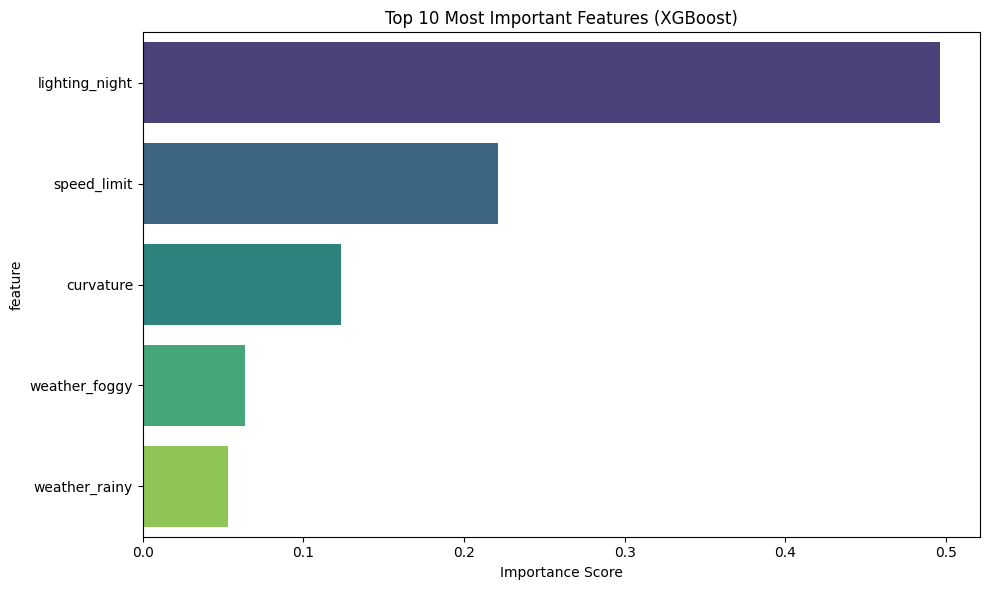

           feature  importance
11  lighting_night    0.496383
2      speed_limit    0.220847
1        curvature    0.123418
12   weather_foggy    0.063854
13   weather_rainy    0.053013


In [72]:
# Analyze what features matter most
best_model = models['XGBoost']

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(5), x='importance', y='feature', palette='viridis')
plt.title('Top 10 Most Important Features (XGBoost)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print(feature_importance.head(5))

In [73]:
df.sample(5)

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
154122,urban,1,0.71,35,dim,clear,False,False,afternoon,False,True,2,0.27
402468,urban,4,0.60,60,daylight,rainy,True,True,evening,False,True,3,0.59
312421,urban,1,0.21,60,night,clear,False,True,morning,True,False,2,0.44
476078,urban,1,0.67,60,dim,rainy,True,True,afternoon,True,True,1,0.44
486629,highway,4,0.02,45,dim,foggy,True,False,evening,False,False,2,0.13


In [84]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Randomized search
xgb_tuned = RandomizedSearchCV(
    xgb.XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Tuning XGBoost... This may take a few minutes.")
xgb_tuned.fit(X_train_scaled, y_train)

print("\nBest parameters:", xgb_tuned.best_params_)
print(f"Best CV RMSE: {np.sqrt(-xgb_tuned.best_score_):.4f}")

# Evaluate on test set
y_pred_tuned = xgb_tuned.predict(X_test_scaled)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"\nTuned Model Performance:")
print(f"  RMSE: {rmse_tuned:.4f}")
print(f"  MAE: {mae_tuned:.4f}")
print(f"  R² Score: {r2_tuned:.4f}")

Tuning XGBoost... This may take a few minutes.
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best CV RMSE: 0.0561

Tuned Model Performance:
  RMSE: 0.0563
  MAE: 0.0437
  R² Score: 0.8852


In [85]:
# Load test data
test_df = pd.read_csv('/Users/abhinavyadav/Kaggle/Kaggle-Swags/Kaggle-Competition/Road-Accident-Prediction/test.csv')

# Save IDs
test_ids = test_df['id'].copy()

# Preprocess test data (same as training)
X_test_final = test_df.drop('id', axis=1)

# Encode categorical variables (use same encoding as training)
X_test_encoded = pd.get_dummies(X_test_final, columns=cat_cols, drop_first=True)

# Align columns with training data
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Scale features
X_test_scaled_final = scaler.transform(X_test_encoded)

# Make predictions
final_predictions = xgb_tuned.predict(X_test_scaled_final)

# Create submission file
submission = pd.DataFrame({
    'id': test_ids,
    'accident_risk': final_predictions
})

submission.to_csv('submission.csv', index=False)
print("\n✅ Submission file created successfully!")
print(f"Number of predictions: {len(submission)}")
print(f"Prediction range: [{final_predictions.min():.4f}, {final_predictions.max():.4f}]")
print("\nFirst few predictions:")
print(submission.head())


✅ Submission file created successfully!
Number of predictions: 172585
Prediction range: [-0.0776, 0.6312]

First few predictions:
       id  accident_risk
0  517754       0.107482
1  517755       0.043567
2  517756       0.187560
3  517757       0.290155
4  517758       0.398647
